# **Capital Assets Pricing Model (CAMP)**

In [30]:
from scipy import stats

In [29]:
import pandas as pd
import yfinance as yf

In [21]:
# 1. 날짜 변수 지정 
# start = '2020-01-01'
# end = '2025-12-31'

# 2. 변수를 사용하여 SPY 데이터 불러오기
# 이렇게 지정해두면 나중에 start_date만 바꾸면 아래 코드는 건드릴 필요가 없습니다.
# spy_etf = yf.download('SPY', start=start, end=end, auto_adjust=True,progress=False)
# spy_etf = yf.download('SPY', period='6y', auto_adjust=True, progress=False)

In [42]:
import yfinance as yf

# 1. SPY 종목 객체를 생성합니다.
spy = yf.Ticker("SPY")

# 2. history 메서드를 사용하여 날짜를 강제로 지정합니다.
# 이 방식은 서버에 더 강력하게 데이터를 요청합니다.
spy_etf = spy.history(start="2020-01-01", end="2025-12-31")

# 3. 이제 확인!
spy_etf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1507 entries, 2020-01-02 00:00:00-05:00 to 2025-12-30 00:00:00-05:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           1507 non-null   float64
 1   High           1507 non-null   float64
 2   Low            1507 non-null   float64
 3   Close          1507 non-null   float64
 4   Volume         1507 non-null   int64  
 5   Dividends      1507 non-null   float64
 6   Stock Splits   1507 non-null   float64
 7   Capital Gains  1507 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 106.0 KB


In [43]:
spy_etf

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2020-01-02 00:00:00-05:00,296.480254,297.717350,295.554718,297.699005,59151200,0.0,0.0,0.0
2020-01-03 00:00:00-05:00,294.299309,296.571900,294.244329,295.444763,77709700,0.0,0.0,0.0
2020-01-06 00:00:00-05:00,293.685302,296.654338,293.566170,296.571869,55653900,0.0,0.0,0.0
2020-01-07 00:00:00-05:00,296.003671,296.480198,295.288909,295.737946,40496400,0.0,0.0,0.0
2020-01-08 00:00:00-05:00,295.930400,298.532868,295.682992,297.314117,68296000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2025-12-23 00:00:00-05:00,683.919983,688.200012,683.869995,687.960022,64840000,0.0,0.0,0.0
2025-12-24 00:00:00-05:00,687.950012,690.830017,687.799988,690.380005,39445600,0.0,0.0,0.0
2025-12-26 00:00:00-05:00,690.640015,691.659973,689.270020,690.309998,41613300,0.0,0.0,0.0


In [44]:
# 0이 아닌 값이 있는 행만 골라내어 보여줍니다.
print("배당금이 지급되었던 날들:")
print(spy_etf[spy_etf['Dividends'] > 0]['Dividends'])

배당금이 지급되었던 날들:
Date
2020-03-20 00:00:00-04:00    1.406
2020-06-19 00:00:00-04:00    1.366
2020-09-18 00:00:00-04:00    1.339
2020-12-18 00:00:00-05:00    1.580
2021-03-19 00:00:00-04:00    1.278
2021-06-18 00:00:00-04:00    1.376
2021-09-17 00:00:00-04:00    1.428
2021-12-17 00:00:00-05:00    1.633
2022-03-18 00:00:00-04:00    1.366
2022-06-17 00:00:00-04:00    1.577
2022-09-16 00:00:00-04:00    1.596
2022-12-16 00:00:00-05:00    1.781
2023-03-17 00:00:00-04:00    1.506
2023-06-16 00:00:00-04:00    1.638
2023-09-15 00:00:00-04:00    1.583
2023-12-15 00:00:00-05:00    1.906
2024-03-15 00:00:00-04:00    1.595
2024-06-21 00:00:00-04:00    1.759
2024-09-20 00:00:00-04:00    1.746
2024-12-20 00:00:00-05:00    1.966
2025-03-21 00:00:00-04:00    1.696
2025-06-20 00:00:00-04:00    1.761
2025-09-19 00:00:00-04:00    1.831
2025-12-19 00:00:00-05:00    1.993
Name: Dividends, dtype: float64


In [32]:
start = pd.to_datetime('2020-01-01')
end = pd.to_datetime('2025-12-31')

In [39]:
apple = yf.download('AAPL',start=start,end=end,auto_adjust=True,progress=False)

In [40]:
apple.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.468269,72.528589,71.223267,71.476607,135480400
2020-01-03,71.763718,72.523746,71.539330,71.696160,146322800
2020-01-06,72.335548,72.374154,70.634532,70.885464,118387200
2020-01-07,71.995361,72.600968,71.775796,72.345212,108872000
2020-01-08,73.153488,73.455087,71.698574,71.698574,132079200


In [38]:
import matplotlib.pyplot as plt

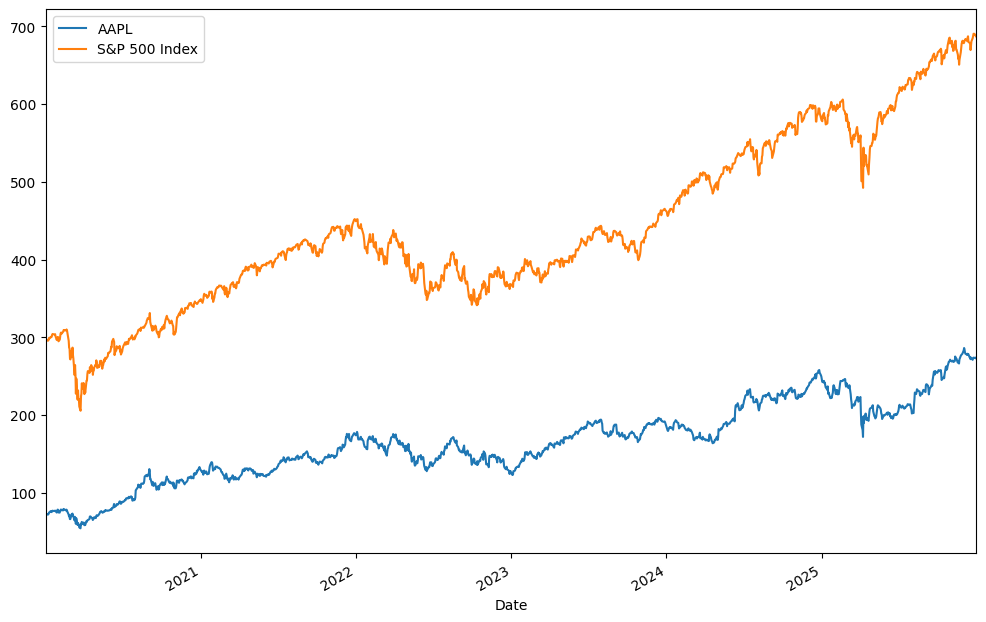

In [51]:
apple['Close'].plot(label='AAPL',figsize=(12,8))
spy_etf['Close'].plot(label='S&P 500 Index')

plt.legend()
plt.margins(x=0)
plt.show()

In [55]:
# 누적 수익률 => 상대 수익률 분석 (Relative Performance)
apple['Cumulative'] = apple['Close'] / apple['Close'].iloc[0]
spy_etf['Cumulative'] = spy_etf['Close'] / spy_etf['Close'].iloc[0]

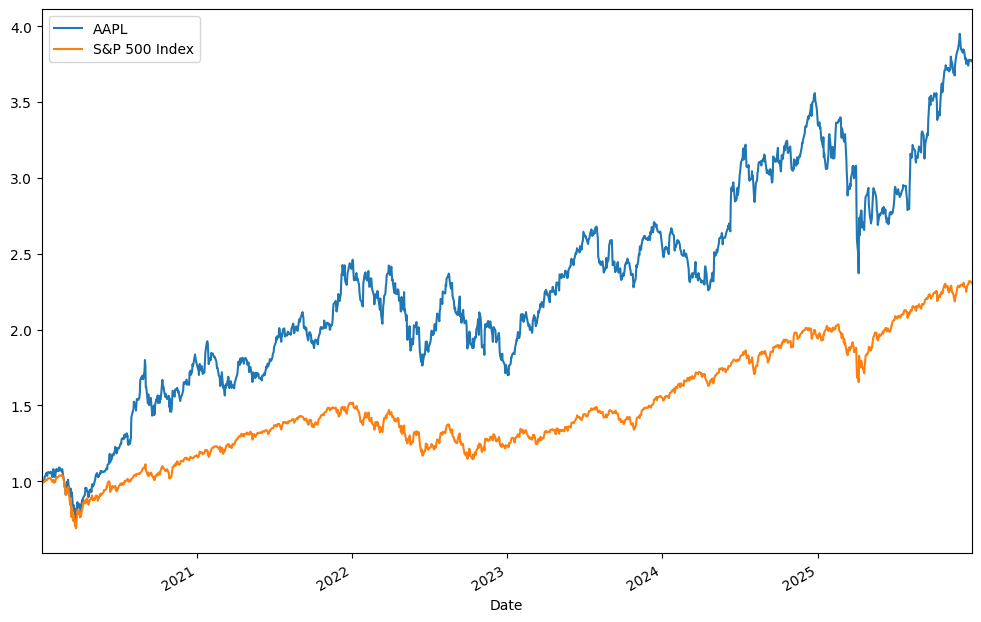

In [54]:
apple['Cumulative'].plot(label='AAPL',figsize=(12,8))
spy_etf['Cumulative'].plot(label='S&P 500 Index')

plt.legend()
plt.margins(x=0)
plt.show()

In [56]:
apple['Daily Return'] = apple['Close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['Close'].pct_change(1)

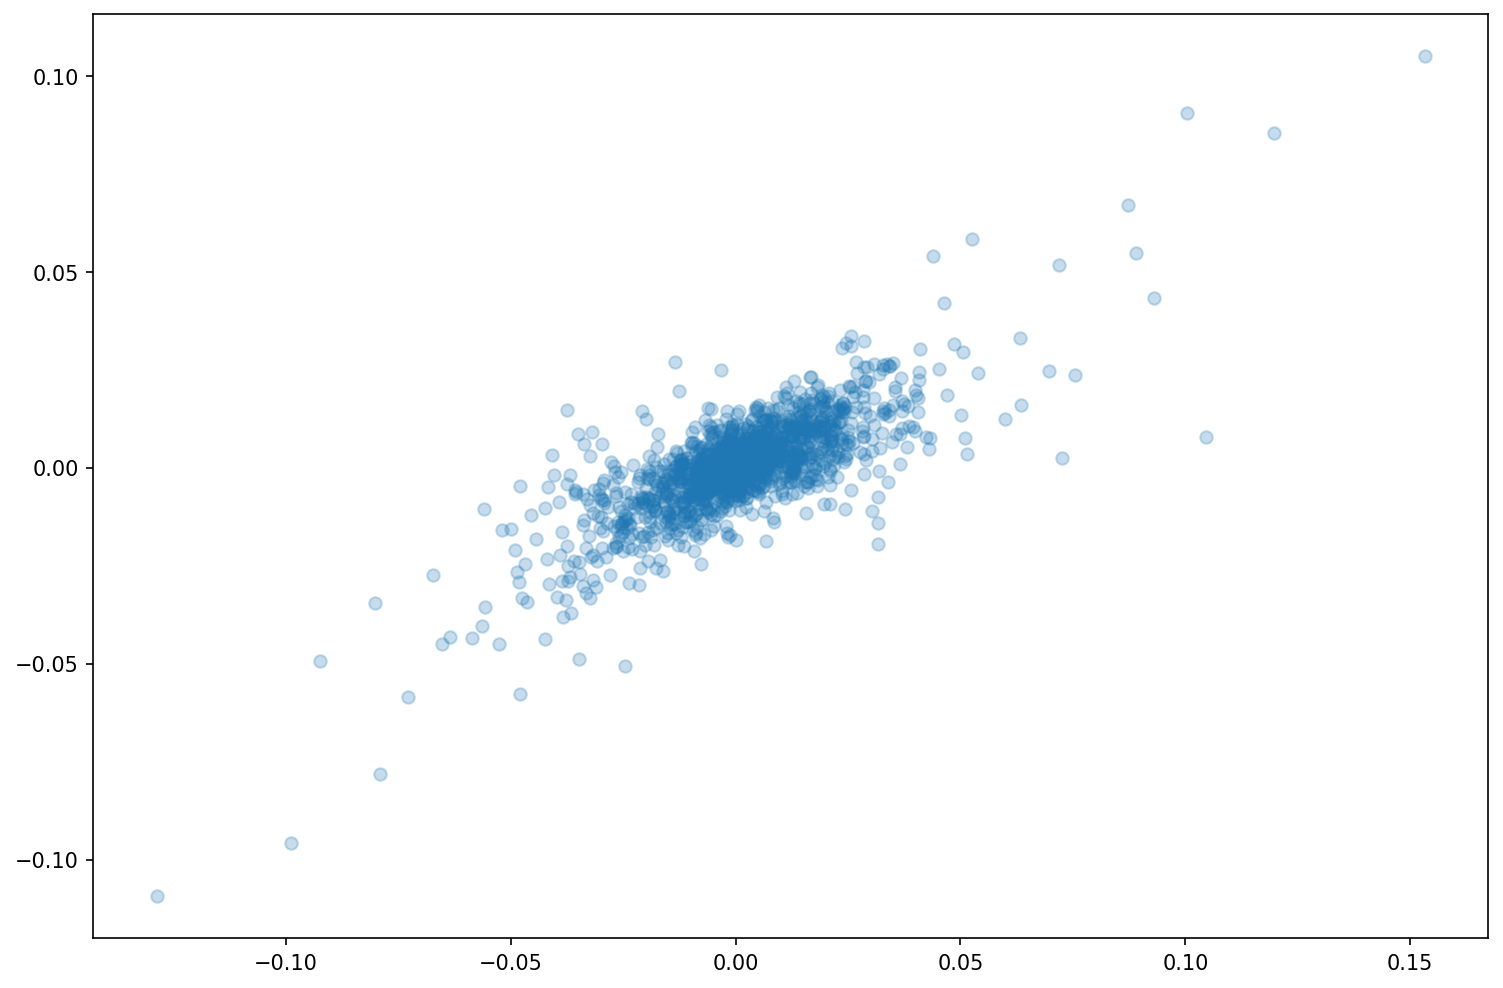

In [59]:
plt.figure(figsize=(12,8),dpi=150)
plt.scatter(apple['Daily Return'],spy_etf['Daily Return'],alpha=0.25)
plt.show()

In [87]:
# 선형 회귀 분석
beta,alpha,r_value,p_value,std_err = stats.linregress(apple['Daily Return'].iloc[1:],
                                                     spy_etf['Daily Return'].iloc[1:])

In [62]:
beta

np.float64(0.5112691772836602)

In [63]:
alpha

np.float64(8.8197849997784e-05)

In [64]:
r_value

np.float64(0.7839175941309184)

In [65]:
import numpy as np

In [77]:
noise = np.random.normal(0,0.001,len(spy_etf['Daily Return'].iloc[1:]))

In [78]:
noise

array([ 0.00067333,  0.00014619, -0.00028235, ...,  0.00240181,
       -0.00099022,  0.00012134], shape=(1506,))

In [79]:
# Y(fake_stock) = 1 × X(spy) + noise
fake_stock = spy_etf['Daily Return'].iloc[1:] + noise

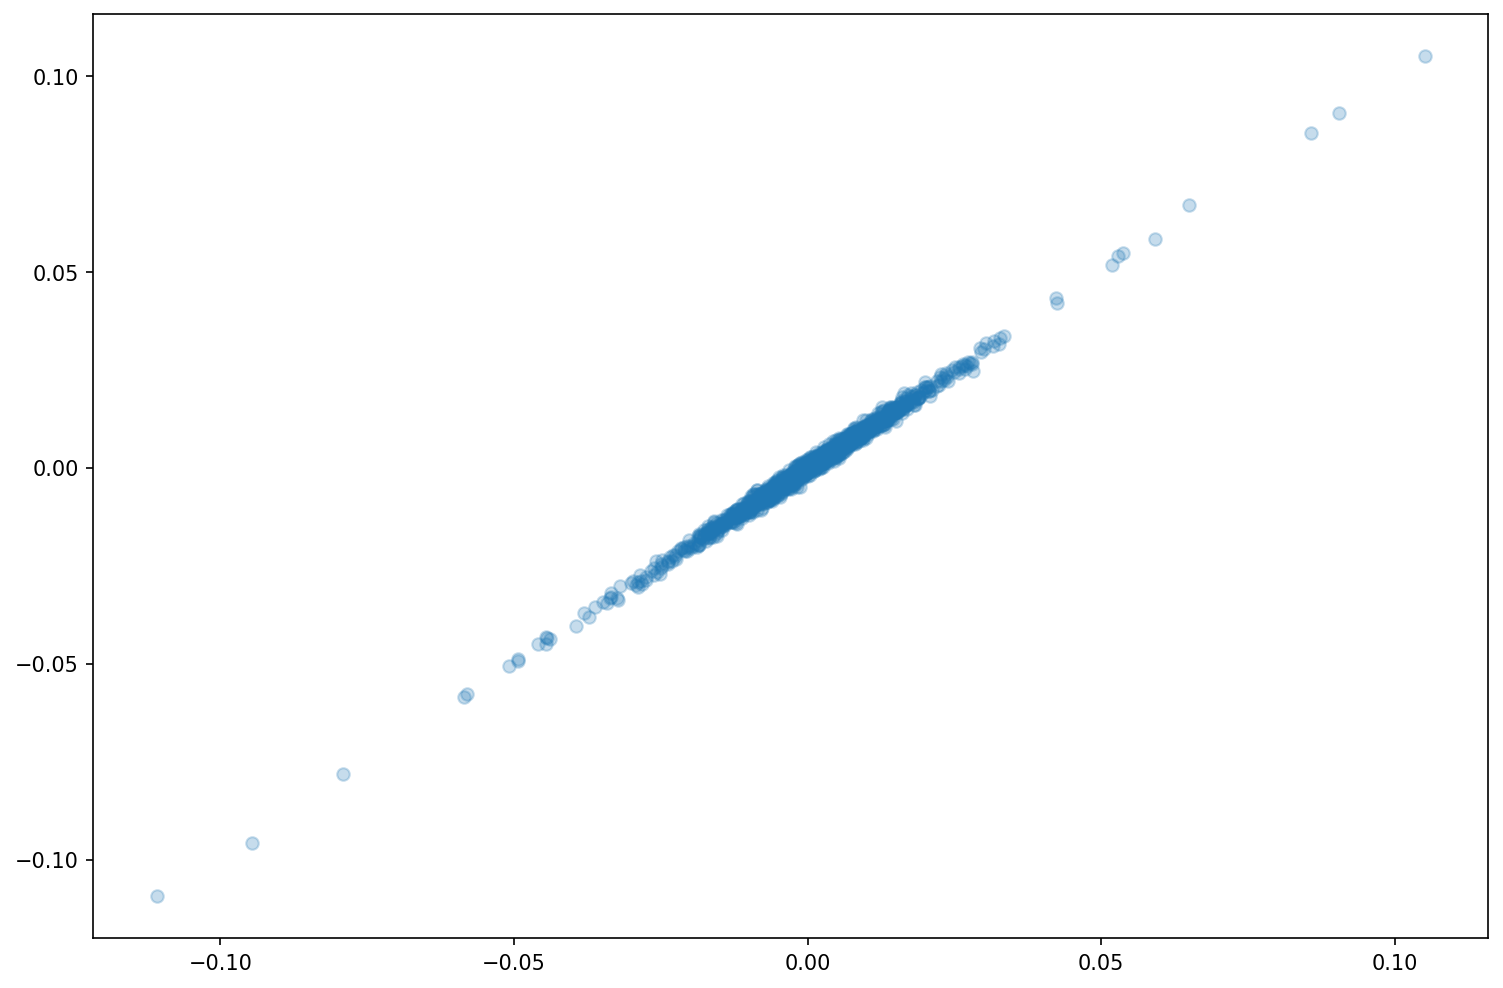

In [80]:
plt.figure(figsize=(12,8),dpi=150)
plt.scatter(fake_stock,spy_etf['Daily Return'].iloc[1:],alpha=0.25)
plt.show()

In [88]:
# 선형 회귀 분석
beta,alpha,r_value,p_value,std_err = stats.linregress(fake_stock,
                                                     spy_etf['Daily Return'].iloc[1:])

In [84]:
beta

np.float64(0.992557550508407)

In [85]:
alpha

np.float64(-3.0117087653574797e-05)

In [86]:
r_value

np.float64(0.9969263490974697)